In [1]:
# Mounts Google Drive to the Colab environment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Zenzephyr/data.csv')

In [4]:
df.head()

,Sadness,Lost Interest,Appetite / weight Changes,Sleeping Issues,No Energy,Hard Concentrate / Decisions,Worthlessness,result
0,0,0,1,0,1,0,0,0
1,0,0,0,1,1,0,0,0
2,1,1,0,1,0,1,0,1
3,0,1,1,1,1,1,0,1
4,1,0,1,0,0,0,0,0


In [5]:
df.tail()

,Sadness,Lost Interest,Appetite / weight Changes,Sleeping Issues,No Energy,Hard Concentrate / Decisions,Worthlessness,result
1995,1,0,1,1,0,0,0,0
1996,1,0,0,1,0,1,1,0
1997,1,1,0,0,0,1,1,0
1998,0,0,1,1,1,1,1,1
1999,1,1,0,1,1,0,1,1


In [6]:
df.size

16000

In [7]:
df.shape

(2000, 8)

In [8]:
df.columns

Index(['Sadness', 'Lost Interest', ' Appetite / weight Changes',
       'Sleeping Issues', 'No Energy', 'Hard Concentrate / Decisions',
       'Worthlessness', 'result'],
      dtype='object')

In [9]:
df.dtypes

Sadness                         int64
Lost Interest                   int64
 Appetite / weight Changes      int64
Sleeping Issues                 int64
No Energy                       int64
Hard Concentrate / Decisions    int64
Worthlessness                   int64
result                          int64
dtype: object

In [10]:
# Check for null values
null_values = df.isnull().sum()
print("Null Values:\n", null_values)

Null Values:
 Sadness                         0
Lost Interest                   0
 Appetite / weight Changes      0
Sleeping Issues                 0
No Energy                       0
Hard Concentrate / Decisions    0
Worthlessness                   0
result                          0
dtype: int64


In [11]:
# Perform exploratory data analysis
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
           Sadness  Lost Interest   Appetite / weight Changes  \
count  2000.000000    2000.000000                 2000.000000   
mean      0.498500       0.511000                    0.496500   
std       0.500123       0.500004                    0.500113   
min       0.000000       0.000000                    0.000000   
25%       0.000000       0.000000                    0.000000   
50%       0.000000       1.000000                    0.000000   
75%       1.000000       1.000000                    1.000000   
max       1.000000       1.000000                    1.000000   

       Sleeping Issues    No Energy  Hard Concentrate / Decisions  \
count      2000.000000  2000.000000                   2000.000000   
mean          0.487000     0.491000                      0.499000   
std           0.499956     0.500044                      0.500124   
min           0.000000     0.000000                      0.000000   
25%           0.000000     0.000000             

In [12]:
print("\nData Information:")
print(df.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Sadness                       2000 non-null   int64
 1   Lost Interest                 2000 non-null   int64
 2    Appetite / weight Changes    2000 non-null   int64
 3   Sleeping Issues               2000 non-null   int64
 4   No Energy                     2000 non-null   int64
 5   Hard Concentrate / Decisions  2000 non-null   int64
 6   Worthlessness                 2000 non-null   int64
 7   result                        2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB
None


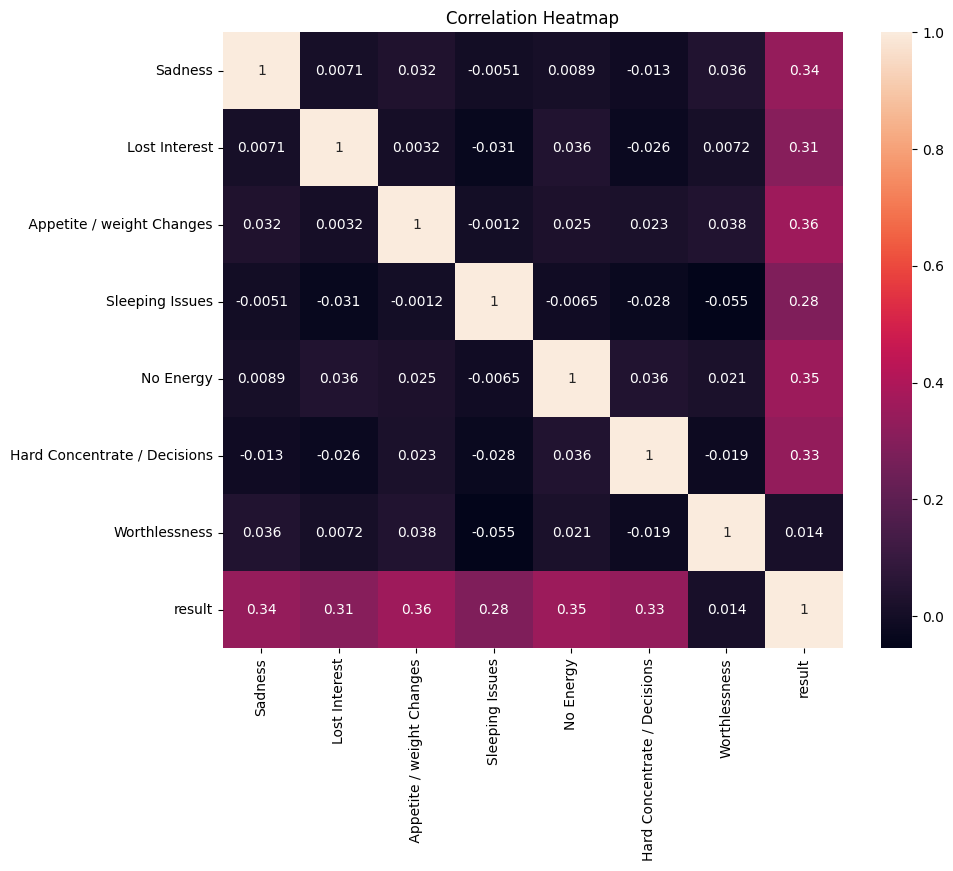

In [13]:
# Create a heatmap for correlation visualization
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Preprocessing

In [14]:
# Preprocessing
X = df.drop('result', axis=1)
y = df['result']

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Train different models
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Machine': SVR(),
    'Random Forest': RandomForestRegressor()
}

best_model = None
best_r2 = -float('inf')  # Initialize with a very low value

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = model.score(X_test, y_test)  # Calculate R-squared
    if r2 > best_r2:
        best_model = model
        best_r2 = r2

# Select the model with the highest R-squared
print(f'The best model is: {best_model}')

# Print the R-squared score of the best model
print(f'R-squared score of the best model: {best_r2}')

The best model is: RandomForestRegressor()
R-squared score of the best model: 1.0


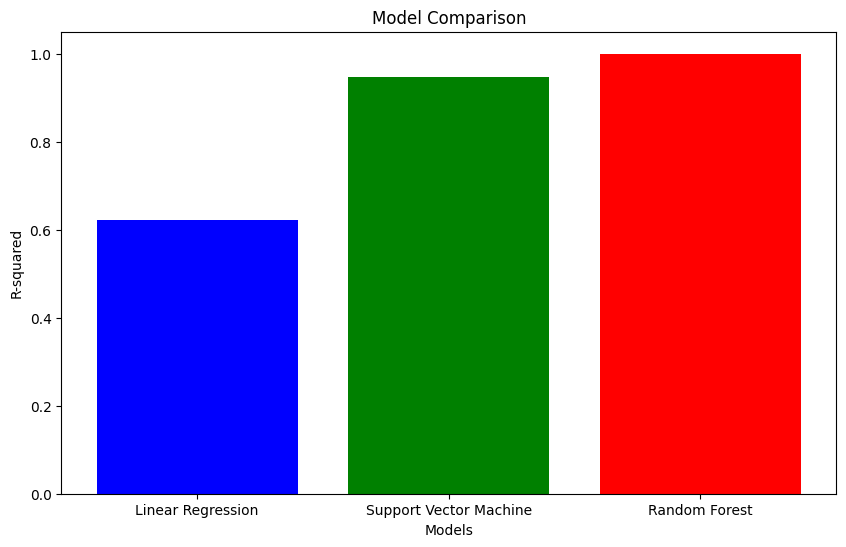

In [18]:
# Initialize dictionaries to store evaluation metrics
r2_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = model.score(X_test, y_test)  # Calculate R-squared
    r2_scores[name] = r2

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Model Comparison')
plt.show()


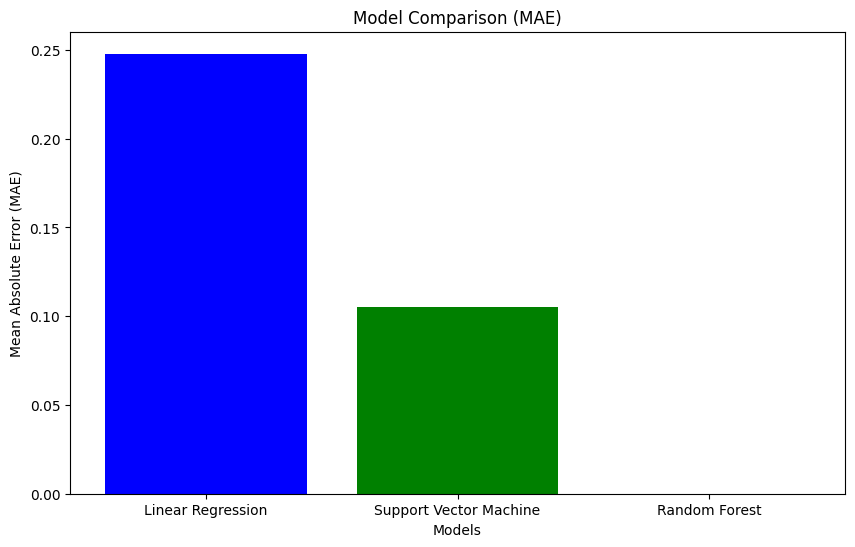

In [19]:
# Initialize dictionaries to store evaluation metrics
mae_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)  # Calculate MAE
    mae_scores[name] = mae

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(mae_scores.keys(), mae_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Comparison (MAE)')
plt.show()

In [20]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest model
rf_model = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, scoring='neg_mean_absolute_error', cv=5)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Get the best model from the search
best_rf_model = grid_search.best_estimator_

# Print the best parameters
print(f'The best parameters are: {grid_search.best_params_}')

# Evaluate the best model
y_pred = best_rf_model.predict(X_test)
best_mae = mean_absolute_error(y_test, y_pred)
print(f'The MAE of the best model is: {best_mae}')

# Save the best model using pickle
with open('/content/drive/MyDrive/Zenzephyr/pickle/best_random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)


The best parameters are: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
The MAE of the best model is: 0.0


In [21]:
# Save the best model using pickle
with open('/content/drive/MyDrive/Zenzephyr/pickle/random_forest_model1.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

In [28]:
0# User inputs
user_inputs = []

# Get user inputs
for i in range(7):
    user_input = float(input(f"Enter value for Feature {i+1}: "))
    user_inputs.append(user_input)

Enter value for Feature 1: 1
Enter value for Feature 2: 0
Enter value for Feature 3: 0
Enter value for Feature 4: 1
Enter value for Feature 5: 0
Enter value for Feature 6: 1
Enter value for Feature 7: 0


In [29]:
# Load the model for prediction with user inputs
with open('/content/drive/MyDrive/Zenzephyr/pickle/random_forest_model1.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [30]:

# Make prediction
predicted_value = loaded_model.predict([user_inputs])
print(f"The predicted value is: {predicted_value[0]}")

The predicted value is: 1.0
